# Capstone 4 - Credit Score  Classification


### Problem Statement:
#### Given a person’s credit-related information, the machine learning model can classify the credit score.

In [1]:
### Import Libraries

# Data Cleaning
import numpy as np
import pandas as pd
import missingno

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Standardization
from sklearn import preprocessing

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model Fine-Tuning
from sklearn.model_selection import GridSearchCV

# Model Evaluation
import sklearn.metrics as metrics

# Supress Unnecessary Warning
import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [2]:
# Importing Data
df = pd.read_csv("CreditScore.csv", index_col='ID')
df.head(10)

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good
0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.43017233,!@9#%8,340.4792118,Good
0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674,Low_spent_Small_value_payments,244.5653167,Good
0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,23.933795,NaN,No,49.574949,24.78521651,High_spent_Medium_value_payments,358.1241676,Standard
0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.2918252,Low_spent_Small_value_payments,470.6906269,Standard


### Data Cleaning & Preprocessing

In [3]:
# Determing the number of Rows and Columns
df.shape

(10000, 27)

In [4]:
# Getting more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0x1602 to 0x5095
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               10000 non-null  object 
 1   Month                     10000 non-null  object 
 2   Name                      9014 non-null   object 
 3   Age                       10000 non-null  object 
 4   SSN                       10000 non-null  object 
 5   Occupation                10000 non-null  object 
 6   Annual_Income             10000 non-null  object 
 7   Monthly_Inhand_Salary     8533 non-null   float64
 8   Num_Bank_Accounts         10000 non-null  int64  
 9   Num_Credit_Card           10000 non-null  int64  
 10  Interest_Rate             10000 non-null  int64  
 11  Num_of_Loan               10000 non-null  object 
 12  Type_of_Loan              8800 non-null   object 
 13  Delay_from_due_date       10000 non-null  int64  
 14  Num_o

#### Columns 'SSN' & 'Name' are not required. Hence dropping these columns.

In [5]:
# Dropping unnecessary columns
df.drop(columns=['SSN', 'Name', 'Type_of_Loan'], axis=1, inplace=True)

In [6]:
df.shape

(10000, 24)

#### Common Utility Functions for Data Cleaning

#### Function to clean junk values in Categorical Columns

In [7]:
# Cleaning Categorical Data by removing underscores '_' and junk values like '!@9#%8' and '#F%$D@*&8'
def clean_str_data(col_list):
    for column in col_list:
        df[column] = df[column].str.strip('_')
        df[column] = df[column].replace({'!@9#%8':np.nan, '#F%$D@*&8':np.nan, 'nan':np.nan, '':np.nan,})

#### Function to clean junk values in Numerical Columns

In [8]:
# Cleaning Numerical Data by removing underscores '_' and junk values like '!@9#%8' and '#F%$D@*&8'
def clean_num_data(col_list):
    for column in col_list:
        df[column] = df[column].replace({'!@9#%8':np.nan, '#F%$D@*&8':np.nan, 'nan':np.nan, '':np.nan})

#### Function to print unique values in columns

In [9]:
# Printing Unique Values
def print_unique(col_list):
    for column in col_list:
        print(f"Column : {column}")
        print(f"DType : {df[column].dtype}")
        print(df[column].unique())
        print("\n");

#### Dealing with Categorical Columns

In [10]:
# Create categorical columns list
cat_col_list = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']

# Print unique values to check the quality of data
print_unique(cat_col_list)

Column : Month
DType : object
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


Column : Occupation
DType : object
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']


Column : Credit_Mix
DType : object
['_' 'Good' 'Standard' 'Bad']


Column : Payment_of_Min_Amount
DType : object
['No' 'NM' 'Yes']


Column : Payment_Behaviour
DType : object
['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments']


Column : Credit_Score
DType : object
['Good' 'Standard' 'Poor']




In [11]:
# Clean Categorical Columns Data
clean_str_data(cat_col_list)

# Verify data cleaned
print_unique(cat_col_list)

Column : Month
DType : object
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


Column : Occupation
DType : object
['Scientist' nan 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


Column : Credit_Mix
DType : object
[nan 'Good' 'Standard' 'Bad']


Column : Payment_of_Min_Amount
DType : object
['No' 'NM' 'Yes']


Column : Payment_Behaviour
DType : object
['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' nan 'High_spent_Large_value_payments']


Column : Credit_Score
DType : object
['Good' 'Standard' 'Poor']




In [12]:
# Converting categorical columns datatype from 'object' to 'category'
for column in cat_col_list:
    df[column] = df[column].astype('category')

In [13]:
# Verifying change of datatype from 'object' to 'category'
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0x1602 to 0x5095
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_ID               10000 non-null  object  
 1   Month                     10000 non-null  category
 2   Age                       10000 non-null  object  
 3   Occupation                9315 non-null   category
 4   Annual_Income             10000 non-null  object  
 5   Monthly_Inhand_Salary     8533 non-null   float64 
 6   Num_Bank_Accounts         10000 non-null  int64   
 7   Num_Credit_Card           10000 non-null  int64   
 8   Interest_Rate             10000 non-null  int64   
 9   Num_of_Loan               10000 non-null  object  
 10  Delay_from_due_date       10000 non-null  int64   
 11  Num_of_Delayed_Payment    9292 non-null   object  
 12  Changed_Credit_Limit      10000 non-null  object  
 13  Num_Credit_Inquiries      9791 non-null   flo

#### Dealing with Numerical Columns

In [14]:
# Checking for Numeric columns listed as 'int64' datatype
num_int_col_list = [column for column in df.columns if (df[column].dtype == 'int64')]

# Print unique values to check the quality of data
print_unique(num_int_col_list)

Column : Num_Bank_Accounts
DType : int64
[   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 1338  649  889 1668  685  857  975 1496
 1534 1620   37 1388 1429 1332 1588  120 1777 1096  803  494  744 1139
  831 1613  741  121  665 1748 1644  823 1356 1651   87  711  450  210
 1671 1722  648  672 1662 1495  510  666  429 1131 1434  980 1026  526
  718 1300 1312 1315  501 1566  480 1042  322  628 1016  333 1265  791
  427  563  905 1190 1036 1611   38  619  555 1769  280  752 1201  812
 1487  222  212 1019 1222  610 1714 1308  525 1158 1115 1616  754 1601
  797 1577  521  703  933  959  809 1089 1656 1113 1715  964 1533 1789
  871  434 1295  565 1724]


Column : Num_Credit_Card
DType : int64
[   4 1385    5 1288    1    7    6 1029  488    8 1381  898    3  518
 1005    9 1327 1189    2   10  514  943  262  809  932 1247  688  848
 1163  674 1315 1130  451   11 1486 1201  169 1423 1297 1299  183  538
 1191 1292 1112  496  803  102  249  98

#### Integer type columns are clean.

In [15]:
# Checking for Numeric columns listed as 'float64' datatype
num_float_col_list = [column for column in df.columns if (df[column].dtype == 'float64')]

# Print unique values to check the quality of data
print_unique(num_float_col_list)

Column : Monthly_Inhand_Salary
DType : float64
[1824.843333         nan 3037.986667 ... 5226.011667 8413.03
 1205.619167]


Column : Num_Credit_Inquiries
DType : float64
[4.000e+00 2.000e+00 3.000e+00       nan 5.000e+00 9.000e+00 8.000e+00
 7.000e+00 6.000e+00 0.000e+00 1.000e+00 1.000e+01 1.050e+03 1.100e+01
 1.200e+01 1.044e+03 1.700e+01 1.936e+03 1.300e+01 5.680e+02 1.618e+03
 5.250e+02 1.400e+01 1.251e+03 1.600e+01 1.500e+01 7.600e+01 2.850e+02
 1.190e+02 6.510e+02 1.241e+03 1.839e+03 1.953e+03 2.321e+03 1.265e+03
 2.473e+03 2.271e+03 1.085e+03 1.194e+03 2.006e+03 1.952e+03 1.197e+03
 2.238e+03 9.960e+02 1.515e+03 4.180e+02 5.160e+02 8.900e+01 8.290e+02
 8.210e+02 1.760e+03 4.600e+01 1.332e+03 2.539e+03 1.673e+03 5.460e+02
 3.300e+01 6.020e+02 1.122e+03 2.134e+03 1.151e+03 9.550e+02 1.030e+02
 1.680e+02 1.386e+03 1.985e+03 7.940e+02 2.079e+03 1.189e+03 9.770e+02
 2.158e+03 1.279e+03 4.600e+02 1.683e+03 3.040e+02 4.860e+02 1.351e+03
 8.600e+01 1.282e+03 1.347e+03 2.592e+03 2.161e+0

In [16]:
# Clean Numerical - float64 type Columns Data
clean_num_data(num_float_col_list)

# Verify data cleaned
print_unique(num_float_col_list)

Column : Monthly_Inhand_Salary
DType : float64
[1824.843333         nan 3037.986667 ... 5226.011667 8413.03
 1205.619167]


Column : Num_Credit_Inquiries
DType : float64
[4.000e+00 2.000e+00 3.000e+00       nan 5.000e+00 9.000e+00 8.000e+00
 7.000e+00 6.000e+00 0.000e+00 1.000e+00 1.000e+01 1.050e+03 1.100e+01
 1.200e+01 1.044e+03 1.700e+01 1.936e+03 1.300e+01 5.680e+02 1.618e+03
 5.250e+02 1.400e+01 1.251e+03 1.600e+01 1.500e+01 7.600e+01 2.850e+02
 1.190e+02 6.510e+02 1.241e+03 1.839e+03 1.953e+03 2.321e+03 1.265e+03
 2.473e+03 2.271e+03 1.085e+03 1.194e+03 2.006e+03 1.952e+03 1.197e+03
 2.238e+03 9.960e+02 1.515e+03 4.180e+02 5.160e+02 8.900e+01 8.290e+02
 8.210e+02 1.760e+03 4.600e+01 1.332e+03 2.539e+03 1.673e+03 5.460e+02
 3.300e+01 6.020e+02 1.122e+03 2.134e+03 1.151e+03 9.550e+02 1.030e+02
 1.680e+02 1.386e+03 1.985e+03 7.940e+02 2.079e+03 1.189e+03 9.770e+02
 2.158e+03 1.279e+03 4.600e+02 1.683e+03 3.040e+02 4.860e+02 1.351e+03
 8.600e+01 1.282e+03 1.347e+03 2.592e+03 2.161e+0

In [17]:
# Confirming Column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0x1602 to 0x5095
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_ID               10000 non-null  object  
 1   Month                     10000 non-null  category
 2   Age                       10000 non-null  object  
 3   Occupation                9315 non-null   category
 4   Annual_Income             10000 non-null  object  
 5   Monthly_Inhand_Salary     8533 non-null   float64 
 6   Num_Bank_Accounts         10000 non-null  int64   
 7   Num_Credit_Card           10000 non-null  int64   
 8   Interest_Rate             10000 non-null  int64   
 9   Num_of_Loan               10000 non-null  object  
 10  Delay_from_due_date       10000 non-null  int64   
 11  Num_of_Delayed_Payment    9292 non-null   object  
 12  Changed_Credit_Limit      10000 non-null  object  
 13  Num_Credit_Inquiries      9791 non-null   flo

#### Dealing with numerical columns listed as 'object' type

In [18]:
# Checking for any numerical column not listed as 'numeric' datatype
need_num_col_list = [column for column in df.columns
                if (df[column].dtype == 'object')]
need_num_col_list

['Customer_ID',
 'Age',
 'Annual_Income',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [19]:
# Print unique values to check the quality of data
print_unique(need_num_col_list)

Column : Customer_ID
DType : object
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0x268f' 'CUS_0x3ba7'
 'CUS_0x1b2a']


Column : Age
DType : object
['23' '-500' '28_' '28' '34' '54' '55' '21' '31' '33' '34_' '7580' '30'
 '30_' '24' '24_' '44' '45' '40' '41' '32' '33_' '35' '35_' '36' '39' '37'
 '181' '20' '46' '26' '42' '19' '31_' '48' '995' '40_' '37_' '38' '54_'
 '5079' '43' '21_' '22' '6409' '16' '7080' '18' '849' '3885' '20_' '15'
 '27' '43_' '38_' '25' '3052' '14' '5342' '17' '18_' '4431' '2657' '2111_'
 '46_' '47' '1032' '16_' '19_' '47_' '456' '5717' '53_' '53' '56' '25_'
 '27_' '55_' '3169' '1191' '29' '42_' '7140' '48_' '49' '49_' '8233'
 '6955' '2534' '3115' '7657' '51' '50' '5112' '50_' '32_' '6452' '2744'
 '22_' '17_' '1439' '29_' '5795' '4872' '1772' '15_' '1383' '5657' '52'
 '1934' '51_' '8352' '3734' '26_' '2056' '39_' '7508' '2339' '14_' '8406'
 '1424' '36_' '6953' '5626' '4471' '548' '44_' '769' '5490' '525' '4202'
 '3665' '7670_' '4670' '3616' '6922' '6619' '1808' '

#### Except for Customer_ID, need to modify all other 'object' datatypes to 'float64'. 

In [20]:
# Remove Customer_ID column from need_num_col_list
need_num_col_list.remove('Customer_ID')
need_num_col_list

['Age',
 'Annual_Income',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [21]:
# Clean numerical column not listed as 'numeric' datatype
clean_str_data(need_num_col_list)

# Verify data cleaned
print_unique(need_num_col_list)

Column : Age
DType : object
['23' '-500' '28' '34' '54' '55' '21' '31' '33' '7580' '30' '24' '44' '45'
 '40' '41' '32' '35' '36' '39' '37' '181' '20' '46' '26' '42' '19' '48'
 '995' '38' '5079' '43' '22' '6409' '16' '7080' '18' '849' '3885' '15'
 '27' '25' '3052' '14' '5342' '17' '4431' '2657' '2111' '47' '1032' '456'
 '5717' '53' '56' '3169' '1191' '29' '7140' '49' '8233' '6955' '2534'
 '3115' '7657' '51' '50' '5112' '6452' '2744' '1439' '5795' '4872' '1772'
 '1383' '5657' '52' '1934' '8352' '3734' '2056' '7508' '2339' '8406'
 '1424' '6953' '5626' '4471' '548' '769' '5490' '525' '4202' '3665' '7670'
 '4670' '3616' '6922' '6619' '1808' '7992' '223' '1232' '4659' '6895'
 '395' '7099' '6048' '3936' '3512' '123' '5639' '471' '7359' '4049' '5053'
 '2109' '7183' '5604' '1206' '6835' '4067' '1812' '1170' '3625' '6354'
 '3724' '480' '5610' '4710' '4351' '5784' '3937' '3542' '2239' '5645'
 '7425' '7851' '2027' '6306' '835' '3513' '6846' '6868' '7805' '7274'
 '831' '8394' '2751' '733' '783' '24

#### Data in 'Credit_History_Age' need to be modified before modifying datatype.

In [22]:
# Using only the year part of "Credit_History_Age"
cr_hist_age_yy = []
for cr_hist_age in df['Credit_History_Age']:
    cr_hist_age_yy.append(str(cr_hist_age).split(' ')[0])
    
df['Credit_History_Age'] = cr_hist_age_yy

In [23]:
print_unique(['Credit_History_Age'])

Column : Credit_History_Age
DType : object
['22' 'nan' '26' '27' '17' '18' '30' '31' '32' '14' '15' '21' '19' '25'
 '8' '9' '16' '29' '6' '7' '10' '33' '12' '13' '28' '24' '1' '11' '20' '0'
 '5' '2' '3' '23' '4']




In [24]:
# Converting numerical columns datatype from 'object' to 'float64'
for column in need_num_col_list:
    df[column] = df[column].astype('float64')

In [25]:
# Confirming Column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0x1602 to 0x5095
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer_ID               10000 non-null  object  
 1   Month                     10000 non-null  category
 2   Age                       10000 non-null  float64 
 3   Occupation                9315 non-null   category
 4   Annual_Income             10000 non-null  float64 
 5   Monthly_Inhand_Salary     8533 non-null   float64 
 6   Num_Bank_Accounts         10000 non-null  int64   
 7   Num_Credit_Card           10000 non-null  int64   
 8   Interest_Rate             10000 non-null  int64   
 9   Num_of_Loan               10000 non-null  float64 
 10  Delay_from_due_date       10000 non-null  int64   
 11  Num_of_Delayed_Payment    9292 non-null   float64 
 12  Changed_Credit_Limit      9799 non-null   float64 
 13  Num_Credit_Inquiries      9791 non-null   flo

### Exploratory Data Analysis

#### Dealing with Missing Values

In [26]:
# Checking for null values
def check_missing_data():
    missing_data = df.isnull().sum().sort_values(ascending = False)
    missing_data = missing_data[missing_data > 0]
    missing_columns = missing_data.index
    return missing_data

In [27]:
# Checking for null values
check_missing_data()

Credit_Mix                 2032
Monthly_Inhand_Salary      1467
Credit_History_Age          932
Payment_Behaviour           780
Num_of_Delayed_Payment      708
Occupation                  685
Amount_invested_monthly     424
Num_Credit_Inquiries        209
Changed_Credit_Limit        201
Monthly_Balance             135
dtype: int64

#### Checking distribution of missing values across the dataset

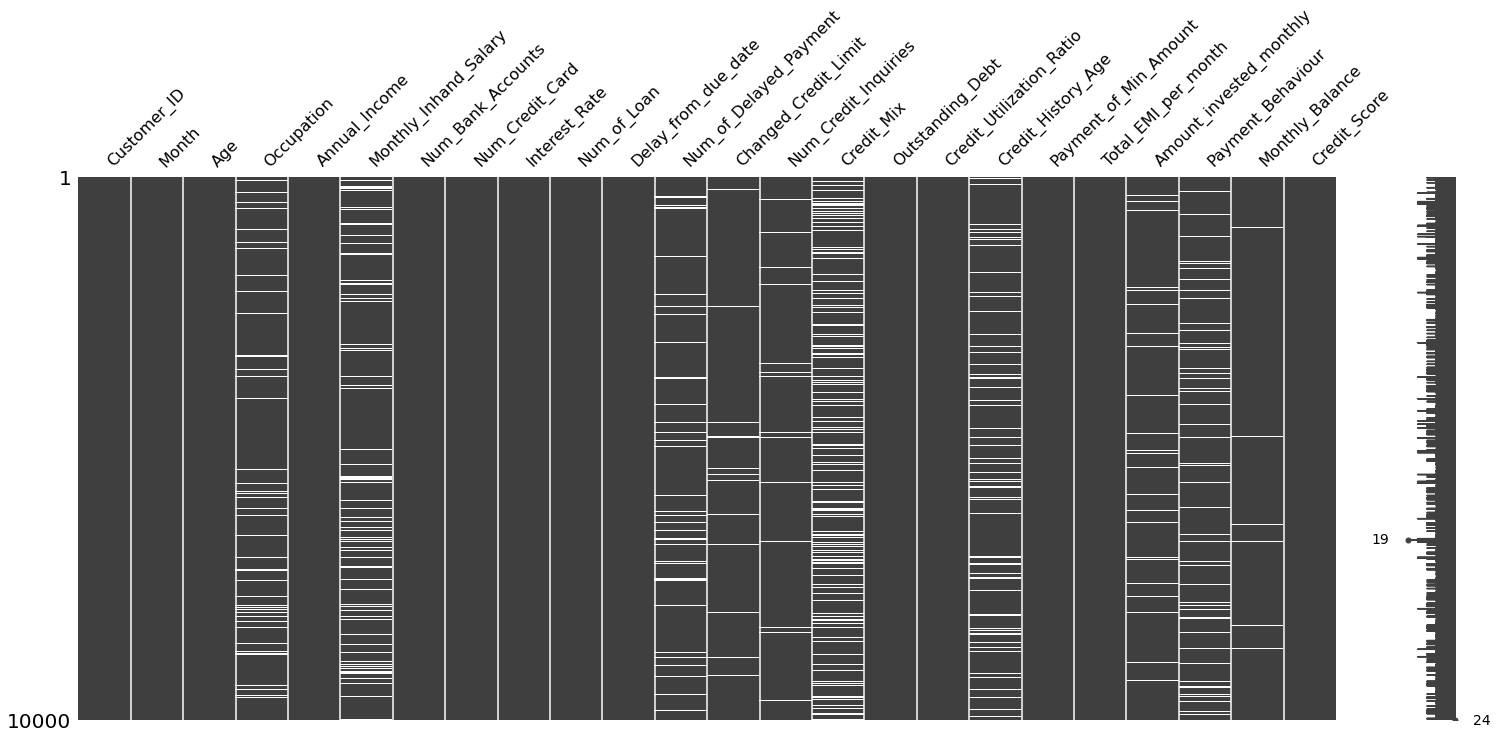

In [28]:
missingno.matrix(df);

#### Missing values are scattered across dataset and not clustered.

#### Dealing with Numeric missing data

In [29]:
# Checking for numeric datatypes in missing_data
missing_col_list = check_missing_data().index
num_missing_data = [column for column in missing_col_list if (df[column].dtype == 'int64') | (df[column].dtype == 'float64')]
num_missing_data

['Monthly_Inhand_Salary',
 'Credit_History_Age',
 'Num_of_Delayed_Payment',
 'Amount_invested_monthly',
 'Num_Credit_Inquiries',
 'Changed_Credit_Limit',
 'Monthly_Balance']

In [30]:
# Updating missing numeric columns based on Customer_Id grouping
for column in num_missing_data:
    if df.groupby(by='Customer_ID').nunique == 1:
        df[column] = df.groupby(by='Customer_ID')[column].transform('median')
    else:
        df[column] = df[column].fillna(method = 'bfill')

In [31]:
# Verify numerical missing data filled
df[num_missing_data].isnull().sum()

Monthly_Inhand_Salary      0
Credit_History_Age         1
Num_of_Delayed_Payment     0
Amount_invested_monthly    0
Num_Credit_Inquiries       0
Changed_Credit_Limit       0
Monthly_Balance            0
dtype: int64

#### Dealing with Categorical missing data

In [32]:
# Checking for categorical datatypes in missing_data
cat_missing_data = [column for column in missing_col_list if (column not in num_missing_data) | (df[column].dtype == 'object')]
cat_missing_data

['Credit_Mix', 'Payment_Behaviour', 'Occupation']

In [33]:
# Updating missing categorical columns based on Customer_Id grouping
for column in cat_missing_data:
    if df.groupby(by='Customer_ID').nunique == 1:
            df[column] = df.groupby(by='Customer_ID')[column].fillna(np.nan)
    else:
        df[column] = df.groupby(by = 'Customer_ID')[column].fillna(method = 'bfill')

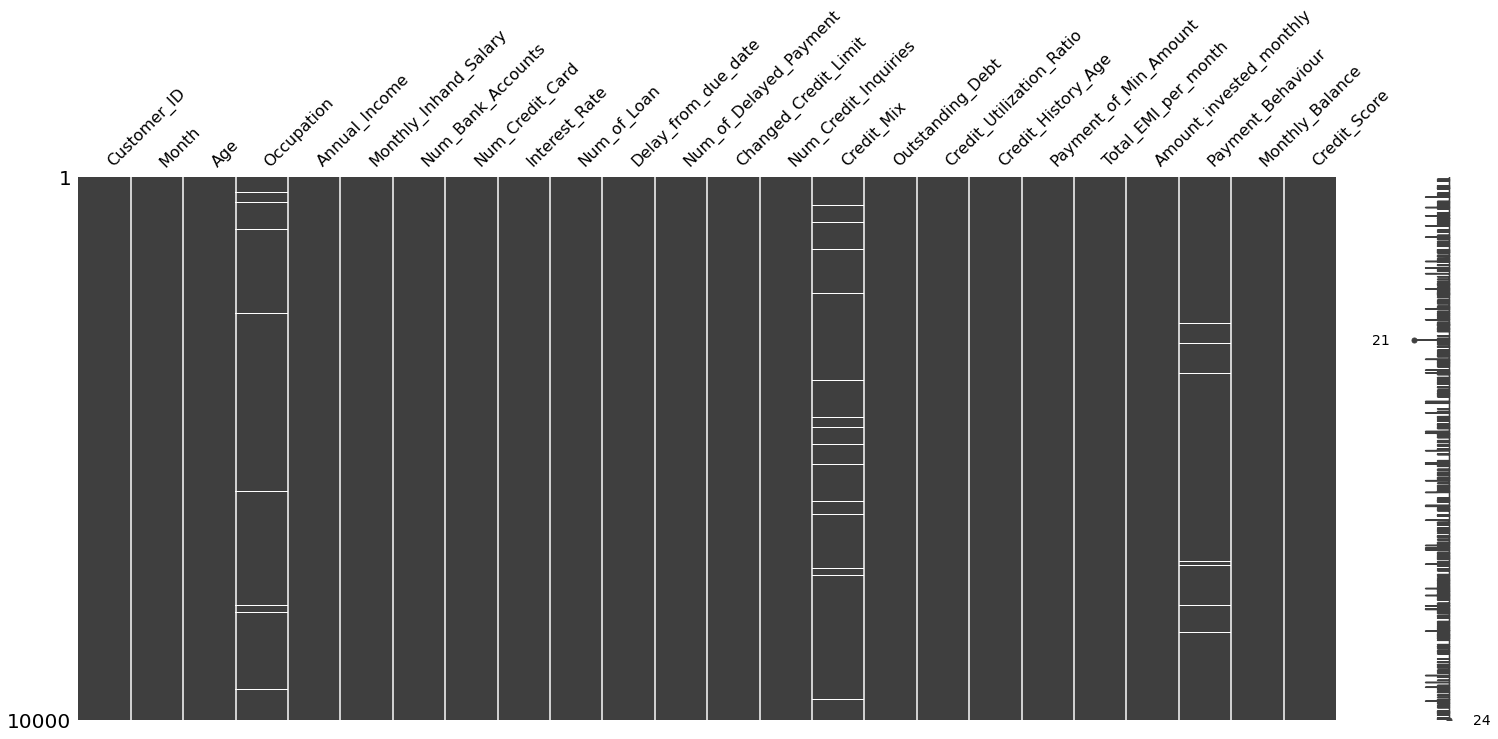

In [34]:
# Visualising the distribution of missing data
missingno.matrix(df);

In [35]:
# Checking missing data
check_missing_data()

Credit_Mix            297
Payment_Behaviour     121
Occupation             92
Credit_History_Age      1
dtype: int64

In [36]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9999.000000,10000.000000,10000.000000,1.000000e+04
mean,119.469100,1.721181e+05,4318.868210,17.583600,24.828300,74.455700,2.92640,21.29880,28.027900,10.312645,24.472600,1413.424280,32.287267,18.180718,1399.238658,646.964319,-3.333333e+22
std,713.981505,1.389360e+06,3202.726440,122.790914,140.202803,470.664749,57.21359,14.61973,199.577018,6.880726,176.595136,1174.382522,5.155147,8.117107,8213.170285,2053.755509,3.333333e+24
min,-500.000000,7.006520e+03,355.208333,0.000000,0.000000,1.000000,-100.00000,-5.00000,-3.000000,-6.480000,0.000000,1.480000,20.172942,0.000000,0.000000,0.000000,-3.333333e+26
25%,25.000000,2.008152e+04,1685.973333,3.000000,4.000000,7.000000,2.00000,10.00000,9.000000,5.190000,3.000000,530.510000,27.971010,12.000000,28.386074,76.345105,2.723062e+02
50%,34.000000,3.969698e+04,3264.601667,6.000000,5.000000,14.000000,3.00000,18.00000,14.000000,9.240000,5.000000,1126.905000,32.270723,18.000000,67.450260,140.177821,3.425564e+02
75%,42.000000,7.527324e+04,6094.433333,8.000000,7.000000,20.000000,5.00000,28.00000,18.000000,14.700000,9.000000,1901.280000,36.527702,25.000000,165.335553,276.888534,4.798240e+02
max,8655.000000,2.418881e+07,14836.736670,1789.000000,1486.000000,5721.000000,1485.00000,67.00000,4128.000000,35.830000,2592.000000,4998.070000,50.000000,33.000000,82204.000000,10000.000000,1.602041e+03


There are some serious outliers in the Age, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan,  Num_of_Delayed_Payment and Num_Credit_Inquiries column which need to be removed.

In [37]:
# Removing Outliers in numeric columns
outlier_columns = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 
                   'Num_of_Delayed_Payment','Num_Credit_Inquiries']
for column in list(outlier_columns):
    q75, q25 = np.percentile(df.loc[:,column],[75,25])
    intr_qr = q75 - q25
 
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)

    df.loc[df[column] < min, column] = np.nan
    df.loc[df[column] > max, column] = np.nan


In [38]:
# Checking serious outliers
check_missing_data()

Num_of_Loan               399
Age                       307
Credit_Mix                297
Num_Credit_Card           242
Interest_Rate             213
Num_Credit_Inquiries      152
Num_Bank_Accounts         123
Payment_Behaviour         121
Occupation                 92
Num_of_Delayed_Payment     73
Credit_History_Age          1
dtype: int64

In [39]:
df.dropna(inplace=True)

In [40]:
check_missing_data()

Series([], dtype: int64)

In [41]:
df.shape

(8199, 24)

In [42]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,8199.000000,8.199000e+03,8199.000000,8199.000000,8199.000000,8199.000000,8199.000000,8199.000000,8199.000000,8199.000000,8199.000000,8199.000000,8199.000000,8199.000000,8199.000000,8199.000000,8.199000e+03
mean,33.401756,1.689218e+05,4321.167599,5.356019,5.497622,14.405293,3.511770,21.353702,13.256007,10.301420,5.758263,1413.562360,32.308211,18.173802,1426.283824,651.360541,-4.065536e+22
std,10.702198,1.364951e+06,3214.486025,2.634195,2.039010,8.840515,2.450252,14.614190,6.341886,6.876793,3.956936,1172.218771,5.152149,8.118656,8285.498854,2064.477987,3.681275e+24
min,14.000000,7.006520e+03,355.208333,0.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-6.480000,0.000000,1.480000,20.172942,0.000000,0.000000,0.000000,-3.333333e+26
25%,25.000000,1.999748e+04,1683.101667,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.150000,3.000000,531.620000,28.006799,12.000000,28.623268,76.097047,2.723637e+02
50%,33.000000,3.964154e+04,3260.465000,6.000000,5.000000,13.000000,3.000000,19.000000,14.000000,9.230000,5.000000,1127.460000,32.274247,18.000000,67.413314,139.895969,3.430735e+02
75%,42.000000,7.565004e+04,6155.640000,8.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.760000,9.000000,1901.280000,36.564917,25.000000,167.081471,275.114451,4.809876e+02
max,56.000000,2.418881e+07,14836.736670,10.000000,11.000000,34.000000,9.000000,67.000000,28.000000,35.830000,17.000000,4998.070000,50.000000,33.000000,82204.000000,10000.000000,1.602041e+03


#### Overall Credit Score Scene

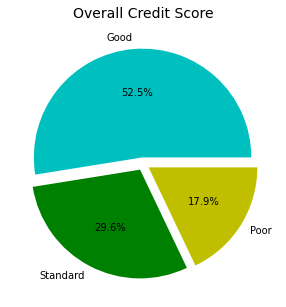

In [43]:
# Checking overall credit score scene
plt.figure(figsize = (5,5))
labels = df['Credit_Score'].unique()
plt.pie(x=df['Credit_Score'].value_counts(), explode=[0.06]*3, labels=labels, autopct="%1.1f%%", colors='cgy', pctdistance=0.6)
plt.title("Overall Credit Score", fontsize=14, pad=10)
plt.show()

#### Credit Mix Imbalances 

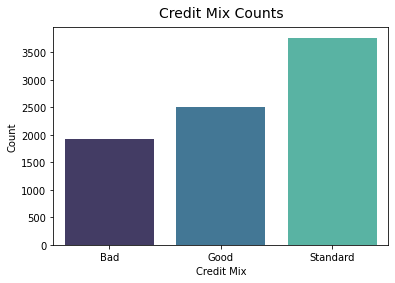

In [44]:
# Checking Credit Mix - wise imbalances
sns.countplot(x=df['Credit_Mix'], data=df, palette='mako');
plt.title("Credit Mix Counts", fontsize=14, pad=10)
plt.xlabel("Credit Mix")
plt.ylabel("Count")
plt.show()

Credit Mix : Most customers had 'Standard' credit mix 

#### Minimum Amount Paid factor Imbalance

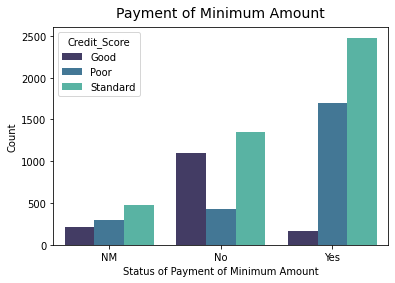

In [45]:
# Checking Minimum Amount Paid - wise imbalances
sns.countplot(x=df['Payment_of_Min_Amount'], data=df, hue='Credit_Score',palette='mako');
plt.title("Payment of Minimum Amount", fontsize=14, pad=10)
plt.xlabel("Status of Payment of Minimum Amount")
plt.ylabel("Count")
plt.show()

Payment of Minimum Amount : Most of the Customers with Good Credit Score DID NOT pay the initial Minimum Amount for loan.

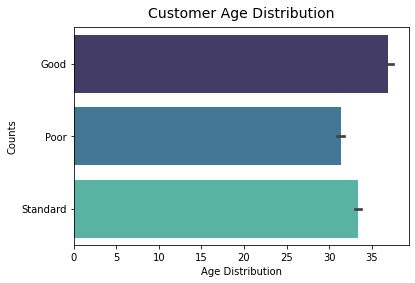

In [46]:
sns.barplot(x=df['Age'], y=df['Credit_Score'], palette='mako');
plt.title("Customer Age Distribution", fontsize=14, pad=10)
plt.xlabel("Age Distribution")
plt.ylabel("Counts")
plt.show()

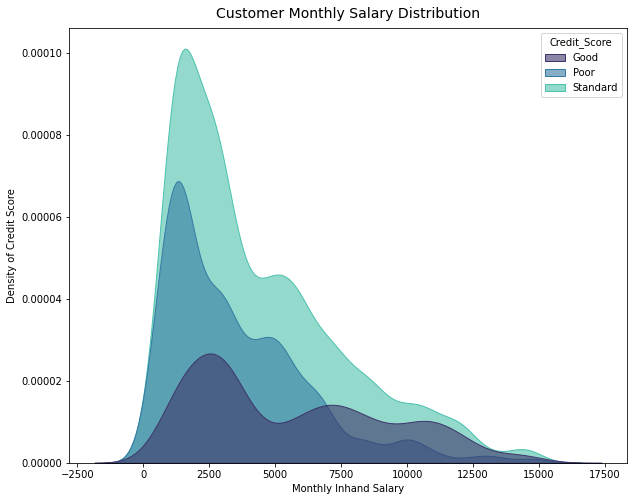

In [47]:
plt.figure(figsize = (10,8))
sns.kdeplot(data=df, x=df['Monthly_Inhand_Salary'], hue=df['Credit_Score'], shade=True, palette='mako', alpha=0.6);
plt.title('Customer Monthly Salary Distribution', fontsize=14, pad=10)
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Density of Credit Score')
plt.show()

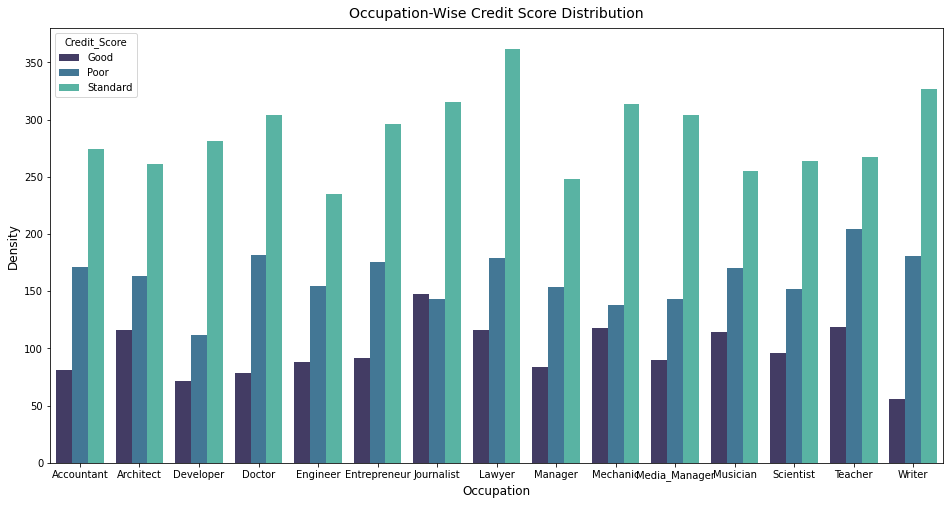

In [48]:
plt.figure(figsize = (16,8))
sns.countplot(x=df['Occupation'], hue=df['Credit_Score'], palette='mako')
plt.title('Occupation-Wise Credit Score Distribution', fontsize=14, pad=10)
plt.ylabel('Density', fontsize = 12)
plt.xlabel('Occupation', fontsize = 12)
plt.show()

### Feature Engineering

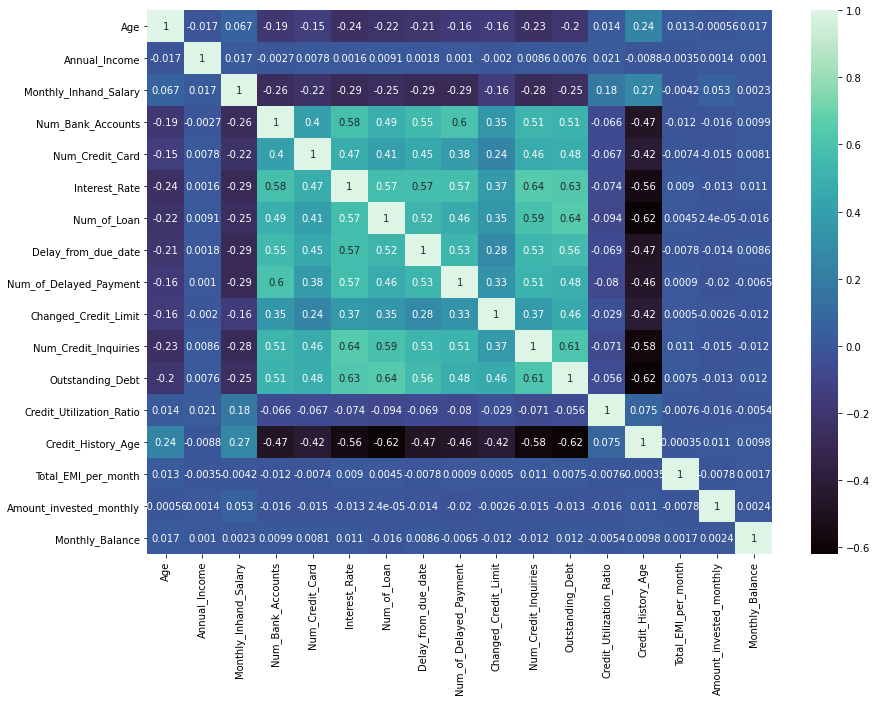

In [49]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='mako')
plt.savefig("corr.jpg")
plt.show()

The column 'Credit_History_Age' has least correlation. Hence can drop.

In [50]:
df.drop('Credit_History_Age', axis=1, inplace=True)

#### Function for Encoding Categorical Columns

In [51]:
def ordinal_encoder(data, column, rank):
    
    ordinal_dict = {}
    
    for rank, value in enumerate(rank):
        ordinal_dict[value] = rank+1
    
    data[column] = data[column].map(lambda x: ordinal_dict[x])
    data[column] = data[column].astype('int32')
    
    return data

#### 'Credit_Score' Encoding

In [52]:
credit_score_uniques = ['Poor', 'Standard', 'Good']  # We need Ordered List
ordinal_encoder(df, 'Credit_Score', credit_score_uniques)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,Good,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,3
0x1603,CUS_0xd40,February,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,3
0x1605,CUS_0xd40,April,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3
0x1606,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3
0x1607,CUS_0xd40,June,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,Good,809.98,27.262259,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x508f,CUS_0x1b2a,February,21.0,Teacher,16603.43,1205.619167,8.0,10.0,30.0,3.0,...,12.0,Standard,2056.83,39.311174,Yes,31.855732,10000.000000,High_spent_Large_value_payments,312.455368,1
0x5090,CUS_0x1b2a,March,21.0,Teacher,16603.43,1205.619167,8.0,10.0,30.0,3.0,...,12.0,Standard,2056.83,38.342795,Yes,31.855732,54.629020,Low_spent_Small_value_payments,324.077164,1
0x5091,CUS_0x1b2a,April,21.0,Teacher,16603.43,1205.619167,8.0,10.0,30.0,3.0,...,12.0,Standard,2056.83,25.652703,Yes,31.855732,68.463940,High_spent_Small_value_payments,280.242244,1


#### 'Credit_Mix' Encoding

In [53]:
credit_mix_uniques = ['Bad', 'Standard', 'Good']  # We need Ordered List
ordinal_encoder(df, 'Credit_Mix', credit_mix_uniques)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,3
0x1603,CUS_0xd40,February,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,3
0x1605,CUS_0xd40,April,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3
0x1606,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3
0x1607,CUS_0xd40,June,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,27.262259,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x508f,CUS_0x1b2a,February,21.0,Teacher,16603.43,1205.619167,8.0,10.0,30.0,3.0,...,12.0,2,2056.83,39.311174,Yes,31.855732,10000.000000,High_spent_Large_value_payments,312.455368,1
0x5090,CUS_0x1b2a,March,21.0,Teacher,16603.43,1205.619167,8.0,10.0,30.0,3.0,...,12.0,2,2056.83,38.342795,Yes,31.855732,54.629020,Low_spent_Small_value_payments,324.077164,1
0x5091,CUS_0x1b2a,April,21.0,Teacher,16603.43,1205.619167,8.0,10.0,30.0,3.0,...,12.0,2,2056.83,25.652703,Yes,31.855732,68.463940,High_spent_Small_value_payments,280.242244,1


#### 'Occupation' Encoding

In [54]:
occupation_uniques = df['Occupation'].unique().dropna()
ordinal_encoder(df, 'Occupation', occupation_uniques)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,3
0x1603,CUS_0xd40,February,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,3
0x1605,CUS_0xd40,April,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,3
0x1606,CUS_0xd40,May,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,3
0x1607,CUS_0xd40,June,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,27.262259,No,49.574949,62.430172,Low_spent_Small_value_payments,340.479212,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x508f,CUS_0x1b2a,February,21.0,2,16603.43,1205.619167,8.0,10.0,30.0,3.0,...,12.0,2,2056.83,39.311174,Yes,31.855732,10000.000000,High_spent_Large_value_payments,312.455368,1
0x5090,CUS_0x1b2a,March,21.0,2,16603.43,1205.619167,8.0,10.0,30.0,3.0,...,12.0,2,2056.83,38.342795,Yes,31.855732,54.629020,Low_spent_Small_value_payments,324.077164,1
0x5091,CUS_0x1b2a,April,21.0,2,16603.43,1205.619167,8.0,10.0,30.0,3.0,...,12.0,2,2056.83,25.652703,Yes,31.855732,68.463940,High_spent_Small_value_payments,280.242244,1


#### 'Payment_Behaviour' Encoding

In [55]:
payment_behaviour_uniques = df['Payment_Behaviour'].unique().dropna()
ordinal_encoder(df, 'Payment_Behaviour', payment_behaviour_uniques)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,26.822620,No,49.574949,80.415295,1,312.494089,3
0x1603,CUS_0xd40,February,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,31.944960,No,49.574949,118.280222,2,284.629163,3
0x1605,CUS_0xd40,April,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,31.377862,No,49.574949,199.458074,3,223.451310,3
0x1606,CUS_0xd40,May,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,24.797347,No,49.574949,41.420153,4,341.489231,3
0x1607,CUS_0xd40,June,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,27.262259,No,49.574949,62.430172,3,340.479212,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x508f,CUS_0x1b2a,February,21.0,2,16603.43,1205.619167,8.0,10.0,30.0,3.0,...,12.0,2,2056.83,39.311174,Yes,31.855732,10000.000000,5,312.455368,1
0x5090,CUS_0x1b2a,March,21.0,2,16603.43,1205.619167,8.0,10.0,30.0,3.0,...,12.0,2,2056.83,38.342795,Yes,31.855732,54.629020,3,324.077164,1
0x5091,CUS_0x1b2a,April,21.0,2,16603.43,1205.619167,8.0,10.0,30.0,3.0,...,12.0,2,2056.83,25.652703,Yes,31.855732,68.463940,1,280.242244,1


#### 'Payment_of_Min_Amount' Encoding

In [56]:
payment_min_amt_uniques = ['No', 'NM', 'Yes']
ordinal_encoder(df, 'Payment_of_Min_Amount', payment_min_amt_uniques)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,26.822620,1,49.574949,80.415295,1,312.494089,3
0x1603,CUS_0xd40,February,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,31.944960,1,49.574949,118.280222,2,284.629163,3
0x1605,CUS_0xd40,April,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,31.377862,1,49.574949,199.458074,3,223.451310,3
0x1606,CUS_0xd40,May,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,24.797347,1,49.574949,41.420153,4,341.489231,3
0x1607,CUS_0xd40,June,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,27.262259,1,49.574949,62.430172,3,340.479212,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x508f,CUS_0x1b2a,February,21.0,2,16603.43,1205.619167,8.0,10.0,30.0,3.0,...,12.0,2,2056.83,39.311174,3,31.855732,10000.000000,5,312.455368,1
0x5090,CUS_0x1b2a,March,21.0,2,16603.43,1205.619167,8.0,10.0,30.0,3.0,...,12.0,2,2056.83,38.342795,3,31.855732,54.629020,3,324.077164,1
0x5091,CUS_0x1b2a,April,21.0,2,16603.43,1205.619167,8.0,10.0,30.0,3.0,...,12.0,2,2056.83,25.652703,3,31.855732,68.463940,1,280.242244,1


#### 'Month' Encoding

In [57]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
ordinal_encoder(df, 'Month', month_names)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,1,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,26.822620,1,49.574949,80.415295,1,312.494089,3
0x1603,CUS_0xd40,2,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,31.944960,1,49.574949,118.280222,2,284.629163,3
0x1605,CUS_0xd40,4,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,31.377862,1,49.574949,199.458074,3,223.451310,3
0x1606,CUS_0xd40,5,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,24.797347,1,49.574949,41.420153,4,341.489231,3
0x1607,CUS_0xd40,6,23.0,1,19114.12,1824.843333,3.0,4.0,3.0,4.0,...,4.0,3,809.98,27.262259,1,49.574949,62.430172,3,340.479212,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x508f,CUS_0x1b2a,2,21.0,2,16603.43,1205.619167,8.0,10.0,30.0,3.0,...,12.0,2,2056.83,39.311174,3,31.855732,10000.000000,5,312.455368,1
0x5090,CUS_0x1b2a,3,21.0,2,16603.43,1205.619167,8.0,10.0,30.0,3.0,...,12.0,2,2056.83,38.342795,3,31.855732,54.629020,3,324.077164,1
0x5091,CUS_0x1b2a,4,21.0,2,16603.43,1205.619167,8.0,10.0,30.0,3.0,...,12.0,2,2056.83,25.652703,3,31.855732,68.463940,1,280.242244,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8199 entries, 0x1602 to 0x5094
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               8199 non-null   object 
 1   Month                     8199 non-null   int32  
 2   Age                       8199 non-null   float64
 3   Occupation                8199 non-null   int32  
 4   Annual_Income             8199 non-null   float64
 5   Monthly_Inhand_Salary     8199 non-null   float64
 6   Num_Bank_Accounts         8199 non-null   float64
 7   Num_Credit_Card           8199 non-null   float64
 8   Interest_Rate             8199 non-null   float64
 9   Num_of_Loan               8199 non-null   float64
 10  Delay_from_due_date       8199 non-null   int64  
 11  Num_of_Delayed_Payment    8199 non-null   float64
 12  Changed_Credit_Limit      8199 non-null   float64
 13  Num_Credit_Inquiries      8199 non-null   float64
 14  Credit

In [59]:
# Final datatype conversion

# Converting respective Integers
outlier_columns.remove('Interest_Rate')
df[outlier_columns] = df[outlier_columns].astype('int32')


In [60]:
# Rounding respective Floats
num_float_col_list = [column for column in df.columns if (df[column].dtype == 'float64')]
for column in num_float_col_list:
    df[column] = round(df[column],2)


In [61]:
df.isna().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [62]:
df.dropna(inplace=True)

In [63]:
df.shape

(8199, 23)

Dropping 'Customer_ID' will prepare the data to be fed in Machine Learning Model

In [64]:
df.drop('Customer_ID', axis=1, inplace=True)

In [65]:
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,1,23,1,19114.12,1824.84,3,4,3.0,4,3,...,4,3,809.98,26.82,1,49.57,80.42,1,312.49,3
0x1603,2,23,1,19114.12,1824.84,3,4,3.0,4,-1,...,4,3,809.98,31.94,1,49.57,118.28,2,284.63,3
0x1605,4,23,1,19114.12,1824.84,3,4,3.0,4,5,...,4,3,809.98,31.38,1,49.57,199.46,3,223.45,3
0x1606,5,23,1,19114.12,1824.84,3,4,3.0,4,6,...,4,3,809.98,24.80,1,49.57,41.42,4,341.49,3
0x1607,6,23,1,19114.12,1824.84,3,4,3.0,4,8,...,4,3,809.98,27.26,1,49.57,62.43,3,340.48,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x508f,2,21,2,16603.43,1205.62,8,10,30.0,3,26,...,12,2,2056.83,39.31,3,31.86,10000.00,5,312.46,1
0x5090,3,21,2,16603.43,1205.62,8,10,30.0,3,26,...,12,2,2056.83,38.34,3,31.86,54.63,3,324.08,1
0x5091,4,21,2,16603.43,1205.62,8,10,30.0,3,26,...,12,2,2056.83,25.65,3,31.86,68.46,1,280.24,1


### Modelling

#### Splitting Data into Train & Test sets

In [66]:
X = df.drop('Credit_Score', axis = 1)
y = df['Credit_Score']

# Train Test Split in the ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123, shuffle=True)

#### Standardization

In [67]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [68]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Creating & Training the model

In [69]:
# Creating a dictionary of Model:AccuracyScore
model_accuracy = {}

##### Model 1 : K-Nearest Neighbors Classifier

              precision    recall  f1-score   support

           1       0.69      0.69      0.69       485
           2       0.75      0.76      0.76       861
           3       0.62      0.58      0.60       294

    accuracy                           0.71      1640
   macro avg       0.69      0.68      0.68      1640
weighted avg       0.71      0.71      0.71      1640



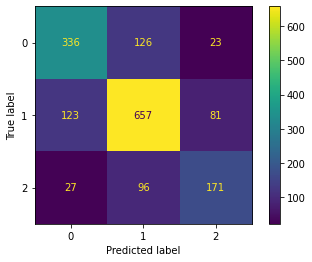

In [70]:
# Create model
knn_model = KNeighborsClassifier()

# Train model
knn_model.fit(X_train_scaled, y_train)

# Making Prediction
y_pred = knn_model.predict(X_test_scaled)

# Displaying Confusion Matrix
metrics.ConfusionMatrixDisplay( metrics.confusion_matrix(y_test, y_pred) ).plot()

# Printing Classification Report
print( metrics.classification_report(y_test, y_pred) )

##### Models 2 : Decision Tree Classifier


              precision    recall  f1-score   support

           1       0.75      0.74      0.74       485
           2       0.77      0.77      0.77       861
           3       0.68      0.68      0.68       294

    accuracy                           0.75      1640
   macro avg       0.73      0.73      0.73      1640
weighted avg       0.75      0.75      0.75      1640



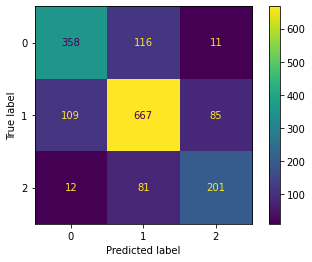

In [71]:
# Create model
decision_tree_model = DecisionTreeClassifier()

# Train model
decision_tree_model.fit(X_train_scaled, y_train)

# Making Prediction
y_pred = decision_tree_model.predict(X_test_scaled)

# Displaying Confusion Matrix
metrics.ConfusionMatrixDisplay( metrics.confusion_matrix(y_test, y_pred) ).plot()

# Printing Classification Report
print( metrics.classification_report(y_test, y_pred) )

##### Models 3 : Random Forest Classifier

              precision    recall  f1-score   support

           1       0.82      0.84      0.83       485
           2       0.84      0.82      0.83       861
           3       0.77      0.80      0.79       294

    accuracy                           0.82      1640
   macro avg       0.81      0.82      0.81      1640
weighted avg       0.82      0.82      0.82      1640



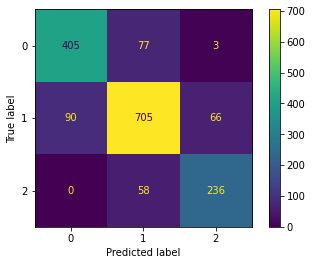

In [72]:
# Create model
random_forest_model = RandomForestClassifier()

# Train model
random_forest_model.fit(X_train_scaled, y_train)

# Making Prediction
y_pred = random_forest_model.predict(X_test_scaled)

# Displaying Confusion Matrix
metrics.ConfusionMatrixDisplay( metrics.confusion_matrix(y_test, y_pred) ).plot()

# Printing Classification Report
print( metrics.classification_report(y_test, y_pred) )

##### Models 4 : Logistic Regression Classifier

              precision    recall  f1-score   support

           1       0.68      0.54      0.60       485
           2       0.70      0.72      0.71       861
           3       0.55      0.68      0.61       294

    accuracy                           0.66      1640
   macro avg       0.64      0.65      0.64      1640
weighted avg       0.67      0.66      0.66      1640



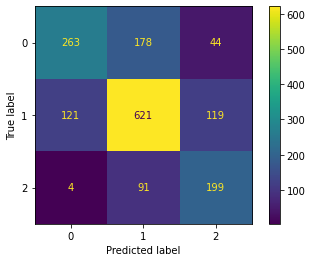

In [73]:
# Create model
log_reg_model = LogisticRegression()

# Train model
log_reg_model.fit(X_train_scaled, y_train)

# Making Prediction
y_pred = log_reg_model.predict(X_test_scaled)

# Displaying Confusion Matrix
metrics.ConfusionMatrixDisplay( metrics.confusion_matrix(y_test, y_pred) ).plot()

# Printing Classification Report
print( metrics.classification_report(y_test, y_pred) )

Of the 4 Machine Learning Model Predictions & Evaluations, Random Forest Classification Model is giving the highest level of Accuracy (82%).